
___
# Movie Recommendation Systems with Python

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv("ratings.csv")

In [3]:
print(df1.head())
df1.dropna()

   userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580


,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
1048570,7120,168,5.0,1175543061
1048571,7120,253,4.0,1175542225
1048572,7120,260,5.0,1175542035
1048573,7120,261,4.0,1175543376


In [4]:
df1.shape

(1048575, 4)

In [5]:
df2 = pd.read_csv("movies.csv")
df2.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
df2.dropna()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [7]:
df2.shape

(27278, 3)

In [8]:
df = pd.merge(df1,df2,on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,851527569,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,849082742,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,835562174,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,846509384,Jumanji (1995),Adventure|Children|Fantasy


In [9]:
df.shape

(1048575, 6)

In [10]:
df.describe()

,userId,movieId,rating,timestamp
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.527086e+03,8.648988e+03,3.529272e+00,1.096036e+09
std,2.018424e+03,1.910014e+04,1.051919e+00,1.594899e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,8.254999e+08
25%,1.813000e+03,9.030000e+02,3.000000e+00,9.658382e+08
50%,3.540000e+03,2.143000e+03,4.000000e+00,1.099263e+09
75%,5.233000e+03,4.641000e+03,4.000000e+00,1.217407e+09
max,7.120000e+03,1.306420e+05,5.000000e+00,1.427764e+09


# Visualization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [12]:
x=df.groupby('title')['rating'].mean().sort_values(ascending=False)
x.head()

title
Still Bill (2009)                                  5.0
Nameless Gangster (Bumchoiwaui junjaeng) (2012)    5.0
Szamanka (1996)                                    5.0
Keith (2008)                                       5.0
Kiler (1997)                                       5.0
Name: rating, dtype: float64

In [13]:
x.shape

(14021,)

In [14]:
y=df.groupby('title')['rating'].count().sort_values(ascending=False)
print(y.head())
y.shape

title
Pulp Fiction (1994)                 3498
Forrest Gump (1994)                 3476
Silence of the Lambs, The (1991)    3247
Shawshank Redemption, The (1994)    3216
Jurassic Park (1993)                3129
Name: rating, dtype: int64


(14021,)

In [15]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
print(ratings.head())
ratings.shape

                                         rating
title                                          
"Great Performances" Cats (1998)          2.875
$5 a Day (2008)                           3.300
'71 (2014)                                3.000
'Hellboy': The Seeds of Creation (2004)   3.125
'Neath the Arizona Skies (1934)           3.500


(14021, 1)

In [16]:
ratings['number of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
print(ratings.head())
ratings.shape

                                         rating  number of ratings
title                                                             
"Great Performances" Cats (1998)          2.875                  8
$5 a Day (2008)                           3.300                  5
'71 (2014)                                3.000                  1
'Hellboy': The Seeds of Creation (2004)   3.125                  4
'Neath the Arizona Skies (1934)           3.500                  2


(14021, 2)

In [17]:
ratings=ratings.rename(columns={"rating": "average_ratings"})
ratings

,average_ratings,number of ratings
title,,
"""Great Performances"" Cats (1998)",2.875000,8
$5 a Day (2008),3.300000,5
'71 (2014),3.000000,1
'Hellboy': The Seeds of Creation (2004),3.125000,4
'Neath the Arizona Skies (1934),3.500000,2
...,...,...
xXx (2002),2.962389,226
xXx: State of the Union (2005),2.500000,31
¡Three Amigos! (1986),3.116208,327


<AxesSubplot:>

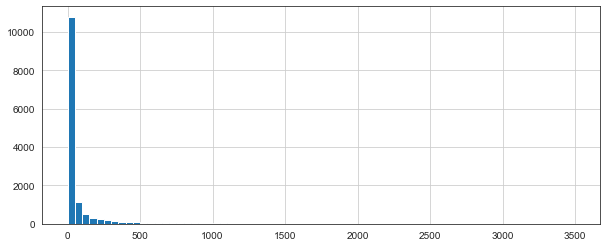

In [18]:
plt.figure(figsize=(10,4))
ratings['number of ratings'].hist(bins=70)

<AxesSubplot:>

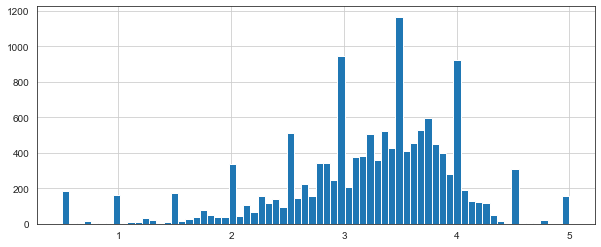

In [19]:
plt.figure(figsize=(10,4))
ratings['average_ratings'].hist(bins=70)

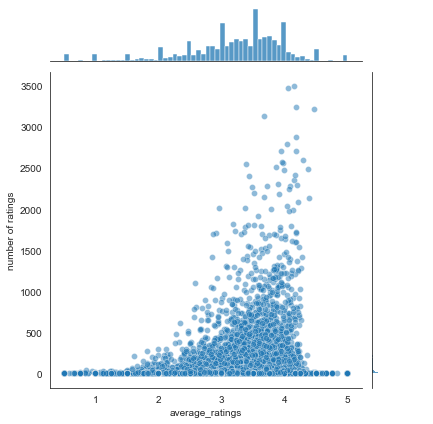

In [20]:
sns.jointplot(x='average_ratings',y='number of ratings',data=ratings,alpha=0.5)

## Recommending Movies

In [21]:
moviematrix = df.pivot_table(index='userId',columns='title',values='rating')
print(moviematrix.head())
moviematrix.shape

title   "Great Performances" Cats (1998)  $5 a Day (2008)  '71 (2014)  \
userId                                                                  
1                                    NaN              NaN         NaN   
2                                    NaN              NaN         NaN   
3                                    NaN              NaN         NaN   
4                                    NaN              NaN         NaN   
5                                    NaN              NaN         NaN   

title   'Hellboy': The Seeds of Creation (2004)  \
userId                                            
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   
5                                           NaN   

title   'Neath the Arizona Skies (1934)  'R Xmas (2001)  \
userId                                                    
1           

(7120, 14021)

In [22]:
ratings=ratings.sort_values('number of ratings',ascending=False)
ratings.head(10)

,average_ratings,number of ratings
title,,
Pulp Fiction (1994),4.153516,3498
Forrest Gump (1994),4.056530,3476
"Silence of the Lambs, The (1991)",4.184786,3247
"Shawshank Redemption, The (1994)",4.469994,3216
Jurassic Park (1993),3.680409,3129
Star Wars: Episode IV - A New Hope (1977),4.189457,2874
Braveheart (1995),4.038228,2799
Terminator 2: Judgment Day (1991),3.948359,2711
"Matrix, The (1999)",4.176340,2705


In [23]:
def clear():
    for i in treev.get_children():
        treev.delete(i)

In [24]:
def correlation():
    recommend_from_movie=c.get()
    try:  
        movie_all_ratings=moviematrix[recommend_from_movie]
        #print(movie_all_ratings.head())
        similar_movies=moviematrix.corrwith(movie_all_ratings)
        #print(similar_movies.head(10))
        corr_similar = pd.DataFrame(similar_movies,columns=['Correlation'])
        corr_similar.dropna(inplace=True)
        #print(corr_similar.head())
        #print(corr_similar.shape)
        corr_similar.sort_values('Correlation',ascending=False).head(10)
        corr_similar=corr_similar.join(ratings['number of ratings'])
        #print(corr_similar.head())
        #print(corr_similar.shape)
        try:    
            z=corr_similar[corr_similar['number of ratings']>100].sort_values('Correlation',ascending=False)
            for i in treev.get_children():
                treev.delete(i)
            for i in range(0,20):
                treev.insert('', 'end',values=(i+1,z.index[i+1][:-6],z.index[i+1][-6:]))
        except:
            messagebox.showinfo("Error", "This Movie has very few ratings try another movie for better recommendation.")
    except:
        messagebox.showinfo("Error", "This Movie name is not available in the database.")
    

In [ ]:
from tkinter import *
from tkinter import ttk
from tkinter import messagebox
from PIL import ImageTk,Image
root=Tk()
background_image=PhotoImage(file='C:\\Users\\ayush\\OneDrive\\Desktop\\image1.png')
background_label = Label(root, image=background_image)
background_label.place(x=0, y=0, relwidth=1, relheight=1)
title=Label(root,text='Movie Recommendation System',font=("Times New Roman", 30),foreground='white',background='black',relief="raise").place(x=340,y=80)
root.geometry('1200x750+120+25')
from tkinter.ttk import Combobox
v=[]
for i in range(len(ratings)):
    v.append(ratings.index[i])
c=Combobox(root,values=v,height=10,width=50, font=('Times New Roman',25))
c.set('select')
c.place(x=165,y=200)
b=Button(root,text='Print',command=correlation,font=('Times New Roman',20)).place(x=405,y=300)
b1=Button(root,text='Clear',command=clear,font=('Times New Roman',20)).place(x=715,y=300)

treev = ttk.Treeview(root, selectmode ='browse') 
treev.place(x=265,y=400)
verscrlbar = ttk.Scrollbar(root,orient ="vertical",command = treev.yview) 
verscrlbar.place(x=915,y=400,height=235)
treev.configure(yscrollcommand=verscrlbar.set)

style = ttk.Style()
style.configure("Treeview.Heading", font=('Calibri', 20,'bold'))

treev["columns"] = ("1", "2", "3")
treev['show'] = 'headings'
treev.column("1", width = 100, anchor ='c') 
treev.column("2", width = 400, anchor ='c') 
treev.column("3", width = 150, anchor ='c')
treev.heading("1", text ="S.No.") 
treev.heading("2", text ="Movie Name") 
treev.heading("3", text ="Year") 

root.mainloop()
